# Malay VITS

VITS, https://github.com/jaywalnut310/vits, https://arxiv.org/abs/2106.06103 trained on https://github.com/huseinzol05/malaya-speech/tree/master/data/azure-tts

## Checkpoints

All checkpoints can get at https://github.com/malaysia-ai/projects/tree/master/malaysia_ai_projects/malay_vits

## Preparation script

All scripts and notebooks can get at https://github.com/malaysia-ai/projects/tree/master/malaysia_ai_projects/malay_vits

## Install necessary requirements

```bash
pip3 install torch>=1.6.0
```

In [10]:
from malaysia_ai_projects import malay_vits

## List available models

In [2]:
malay_vits.available_model()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,Size (MB)
yasmin,139
osman,139


## Load model

```python
def load(model: str = 'osman'):
    """
    Load Malay VITS model.

    Parameters
    ----------
    model : str, optional (default='osman')
        Model architecture supported. Allowed values:

        * ``'osman'`` - VITS Osman speaker, https://huggingface.co/malay-huggingface/VITS-Osman
        * ``'yasmin'`` - VITS Yasmin speaker, https://huggingface.co/malay-huggingface/VITS-Yasmin

    Returns
    -------
    result : malaysia_ai_projects.malay_vits.Model class
    """
```

In [3]:
model = malay_vits.load()

## Predict

```python
def predict(
    self,
    input: str,
    noise_scale: float = 0.667,
    noise_scale_w: float = 0.8,
    length_scale: float = 1.0,
    norm_function: Callable = None
):
    """
    Parameters
    ----------
    input: str
    noise_scale: float, optional (default=0.667)
    noise_scale_w: float, optional (default=0.8)
    length_scale: float, optional (default=1.0)
    norm_function: Callable, optional (default=None)

    Returns
    -------
    result: (audio with 22050 sample rate, text, list of chars, alignment)
    """
```

In [12]:
string = 'KUALA LUMPUR: Wakil rakyat dan semua agensi kerajaan perlu bertindak proaktif dengan turun padang untuk meninjau dan menyelami isu rakyat secara lebih dekat serta memantau pencapaian program diumumkan kerajaan.'

In [13]:
audio, text, decoded, alignment = model.predict(string)

In [14]:
import IPython.display as ipd
ipd.Audio(audio, rate= 22050)

## Plot alignment

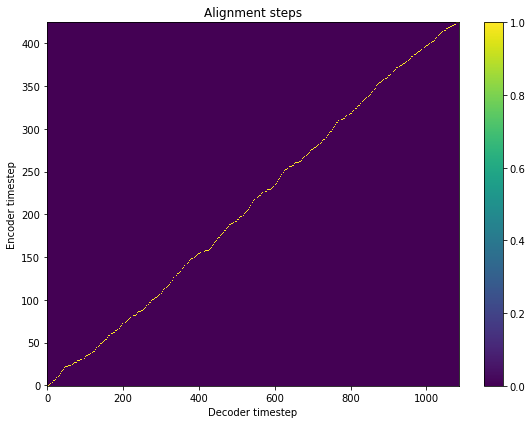

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_title('Alignment steps')
im = ax.imshow(
    alignment.T,
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

## Use Malaya text normalization

Make sure Malaya version >= 4.7.5 to get better text normalization.

In [16]:
import malaya

malaya.__version__

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.5.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_addons/utils/resource_loader.py:103: UserWarning: You are currently using TensorFlow 2.9.0 and trying to load a custom op (custom_ops/seq2seq/_beam_search_o

'4.7.5'

In [17]:
normalizer = malaya.normalize.normalizer()

In [18]:
kwargs = {
    'normalize_entity': False,
    'normalize_text': False,
    'normalize_url': True,
    'normalize_email': True,
    'normalize_telephone': True,
    'check_english_func': None,
}

In [22]:
norm_function = lambda x: normalizer.normalize(x, **kwargs)['normalize']

In [30]:
string = 'email husein adalah husein.zol05@gmail.com, halaman http://huseinhouse.com dan sangat comel'
norm_function(string)

'email husein adalah husein dot zol kosong lima di gmail dot com , halaman HTTP huseinhouse dot com dan sangat comel'

In [31]:
audio, text, decoded, alignment = model.predict(string, norm_function = norm_function)

In [32]:
ipd.Audio(audio, rate= 22050)

In [33]:
text

'email husein adalah husein dot zol kosong lima di gmail dot com , halaman HTTP huseinhouse dot com dan sangat comel .'